Vamos a comparar una regresión hecha con sklear con una hecha con keras.

In [37]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
boston_housing = keras.datasets.boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

df_train = pd.DataFrame(np.column_stack([X_train, y_train]), columns=features)
print(df_train.shape)
df_train.head(10)

(404, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


In [12]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

In [13]:
regre = LinearRegression()
regre.fit(X_train_prep, y_train)
pred = regre.predict(X_test_prep)

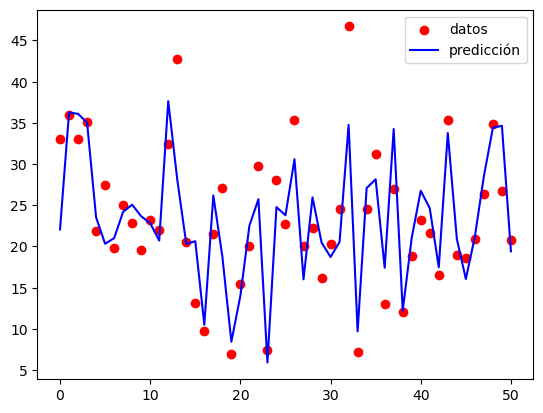

In [14]:
x = range(0, len(y_test))
plt.scatter(x, y_test, color='red', label='datos')
plt.plot(x, pred, color='blue', label='predicción')
plt.legend()
plt.show()

### KERAS

In [15]:
from keras import models, layers

network = models.Sequential()

network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1)) # No hay activation ya que es regresion

network.compile(loss='mean_squared_error',
                optimizer='sgd')

In [16]:
history = network.fit(X_train_prep, 
                      y_train, 
                      epochs=30, 
                      validation_data=(X_val_prep, y_val))

Epoch 1/30
13/13 [==============================] - 1s 21ms/step - loss: 453.8128 - val_loss: 201.2596
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 205.7618 - val_loss: 169.2233
Epoch 3/30
13/13 [==============================] - 0s 5ms/step - loss: 65.9100 - val_loss: 172.0289
Epoch 4/30
13/13 [==============================] - 0s 5ms/step - loss: 58.7831 - val_loss: 39.3132
Epoch 5/30
13/13 [==============================] - 0s 5ms/step - loss: 40.4867 - val_loss: 34.5214
Epoch 6/30
13/13 [==============================] - 0s 5ms/step - loss: 26.4828 - val_loss: 45.0720
Epoch 7/30
13/13 [==============================] - 0s 6ms/step - loss: 31.1304 - val_loss: 41.7454
Epoch 8/30
13/13 [==============================] - 0s 5ms/step - loss: 41.0800 - val_loss: 77.6527
Epoch 9/30
13/13 [==============================] - 0s 4ms/step - loss: 35.0516 - val_loss: 32.0771
Epoch 10/30
13/13 [==============================] - 0s 5ms/step - loss: 24.0239 - val_loss: 4

In [17]:
df2 = pd.DataFrame(X_test_prep, columns=features[:-1])
df2.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.069397,1.4,-0.640709,0.0,-0.684831,1.233231,-0.390746,1.999605,-0.1,-0.294574,-0.168067,0.092623,-0.327861
1,0.109822,1.6,-0.441018,0.0,0.612360,1.545114,0.442159,-0.410306,0.0,-0.170543,-2.050420,-0.370491,-0.353345


In [18]:
pred_keras = network.predict(df2)

2/2 [==============================] - 0s 4ms/step


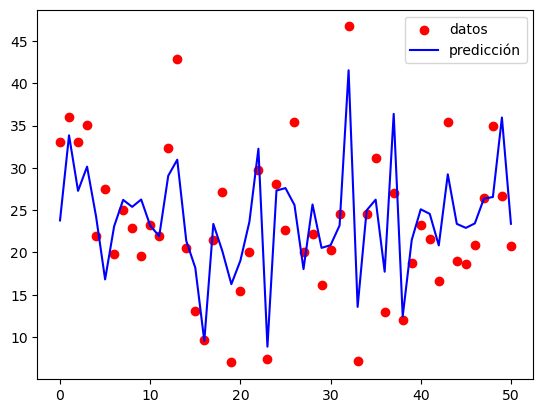

In [19]:
x = range(0, len(y_test))
plt.scatter(x, y_test, color='red', label='datos')
plt.plot(x, pred_keras, color='blue', label='predicción')
plt.legend()
plt.show()

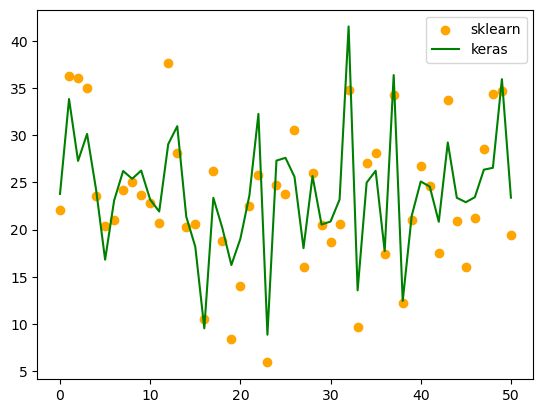

In [20]:
x = range(0, len(y_test))
plt.scatter(x, pred, color='orange', label='sklearn')
plt.plot(x, pred_keras, color='green', label='keras')
plt.legend()
plt.show()

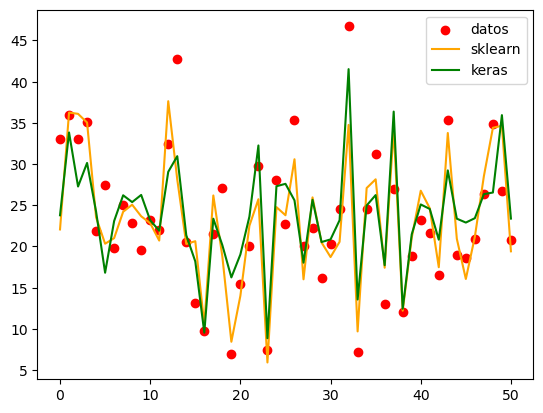

In [22]:
x = range(0, len(y_test))
plt.scatter(x, y_test, color='red', label='datos')
plt.plot(x, pred, color='orange', label='sklearn')
plt.plot(x, pred_keras, color='green', label='keras')
plt.legend()
plt.show()

In [41]:
r2_keras = metrics.r2_score(y_test, pred_keras.flatten())
r2_sk = metrics.r2_score(y_test, pred)

print(f'r2 keras: {r2_keras}')
print(f'r2 sklearn: {r2_sk}')

r2 keras: 0.6458952850162811
r2 sklearn: 0.7112271207392951
